In [187]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans, HDBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score


In [3]:
pd.set_option('display.max_columns', None)

In [45]:
file_path = '/Users/mrs.zhuang/Documents/Msc_Machine_Learning/Final_Project/Merge_cell_seg_data.txt'
df = pd.read_csv(file_path, sep='\t')

In [ ]:
# df.head()

In [46]:
df_clean = df.dropna(axis=1, how='all')

In [47]:
df_clean

Path  \
0        F:\For Inform analysis Fusion\Final staining\E...   
1        F:\For Inform analysis Fusion\Final staining\E...   
2        F:\For Inform analysis Fusion\Final staining\E...   
3        F:\For Inform analysis Fusion\Final staining\E...   
4        F:\For Inform analysis Fusion\Final staining\E...   
...                                                    ...   
1392232  F:\For Inform analysis Fusion\Final staining\b...   
1392233  F:\For Inform analysis Fusion\Final staining\b...   
1392234  F:\For Inform analysis Fusion\Final staining\b...   
1392235  F:\For Inform analysis Fusion\Final staining\b...   
1392236  F:\For Inform analysis Fusion\Final staining\b...   

                                              Sample Name Tissue Category  \
0        Eric recsan block 1 opt white slide_Scan1.qptiff          stroma   
1        Eric recsan block 1 opt white slide_Scan1.qptiff      epithelium   
2        Eric recsan block 1 opt white slide_Scan1.qptiff      epithelium   
3        Eric recsan block 1 opt white slide_Scan1.qptiff      epithelium   
4        Eric recsan block 1 opt white slide_Scan1.qptiff      epithelium   
...                                                   ...             ...   
1392232                       bl 9 ws inform_Scan2.qptiff          stroma   
1392233                       bl 9 ws inform_Scan2.qptiff          stroma   
1392234                       bl 9 ws inform_Scan2.qptiff      epithelium   
1392235                       bl 9 ws inform_Scan2.qptiff      epithelium   
1392236                       bl 9 ws inform_Scan2.qptiff          stroma   

                          Phenotype  Cell ID  Cell X Position  \
0                              CD3+     1208           6484.8   
1                               CK+     1209           6492.7   
2                              CD3+     1210           6643.8   
3                              CD3+     1211           6488.8   
4                              CD3+     1212           6568.5   
...                             ...      ...              ...   
1392232                      other+   147066          20042.2   
1392233  Double_positive_CD64+CD68+   147067          20379.8   
1392234                         CK+   147068          20561.2   
1392235                         CK+   147069          20764.2   
1392236  Double_positive_CD64+CD68+   147070          20524.3   

         Cell Y Position  Category Region ID  \
0                30805.3               756.0   
1                30818.3               597.0   
2                30838.2               597.0   
3                30842.7               597.0   
4                30847.2               597.0   
...                  ...                 ...   
1392232          51322.2                 NaN   
1392233          51458.8             10172.0   
1392234          51501.7             10049.0   
1392235          51503.7             10049.0   
1392236          51591.4             10172.0   

         Distance from Tissue Category Edge (microns)  \
0                                                 7.0   
1                                                 2.2   
2                                                 7.5   
3                                                13.0   
4                                                17.7   
...                                               ...   
1392232                                           1.0   
1392233                                          10.3   
1392234                                          61.4   
1392235                                          17.6   
1392236                                          12.0   

         Nucleus Area (square microns) Nucleus Area (percent)  \
0                                 11.9                  0.01%   
1                                  8.7                  0.00%   
2                                 12.4                  0.00%   
3                                 13.7                  0.00%   
4               

In [ ]:
df_clean.info()
df_clean.describe()

In [48]:
# a = df_clean.isna().any()
n = df_clean.isna().sum()
with pd.option_context('display.max_rows', None):  # Set to temporarily display all lines
    print(n)

Path                                                                               0
Sample Name                                                                        0
Tissue Category                                                                    0
Phenotype                                                                        252
Cell ID                                                                            0
Cell X Position                                                                    0
Cell Y Position                                                                    0
Category Region ID                                                            139627
Distance from Tissue Category Edge (microns)                                    1325
Nucleus Area (square microns)                                                      0
Nucleus Area (percent)                                                             0
Nucleus Compactness                                              

### Path(remove), Phenotype(remove null rows), Category Region ID(remove), Slide ID(remove),  

In [49]:
nan_categories = df_clean[df_clean['Category Region ID'].isna()]
nan_categories.head(5)
# Check the Null values of 'Category Region ID' 

Path  \
16  F:\For Inform analysis Fusion\Final staining\E...   
23  F:\For Inform analysis Fusion\Final staining\E...   
24  F:\For Inform analysis Fusion\Final staining\E...   
29  F:\For Inform analysis Fusion\Final staining\E...   
34  F:\For Inform analysis Fusion\Final staining\E...   

                                         Sample Name Tissue Category  \
16  Eric recsan block 1 opt white slide_Scan1.qptiff          stroma   
23  Eric recsan block 1 opt white slide_Scan1.qptiff      epithelium   
24  Eric recsan block 1 opt white slide_Scan1.qptiff          stroma   
29  Eric recsan block 1 opt white slide_Scan1.qptiff          stroma   
34  Eric recsan block 1 opt white slide_Scan1.qptiff          stroma   

   Phenotype  Cell ID  Cell X Position  Cell Y Position  Category Region ID  \
16      CD3+     1224           6727.1          30945.4                 NaN   
23      CD3+     1231           6728.1          30992.8                 NaN   
24      CD3+     1232           6759.0          30996.8                 NaN   
29      CD3+     1237           6747.0          30999.8                 NaN   
34       CK+     1242           6417.0          31050.6                 NaN   

    Distance from Tissue Category Edge (microns)  \
16                                           0.5   
23                                           1.0   
24                                           0.5   
29                                           0.5   
34                                           1.4   

    Nucleus Area (square microns) Nucleus Area (percent)  Nucleus Compactness  \
16                           12.9                  0.01%                 0.78   
23                           13.9                  0.00%                 0.69   
24                           13.9                  0.01%                 0.78   
29                            9.2                  0.00%                 0.81   
34                           11.4                  0.01%                 0.86   

    Nucleus Minor Axis  Nucleus Major Axis  Nucleus Axis Ratio  \
16                3.68                4.73                1.28   
23                4.29                4.52                1.05   
24                3.99                4.49                1.13   
29                3.49                3.49                1.00   
34                3.49                3.99                1.14   

    Nucleus DAPI (DAPI) Min (Normalized Counts, Total Weighting)  \
16                                               1.91              
23                                               0.00              
24                                               0.00              
29                                               0.00              
34                                               0.00              

    Nucleus DAPI (DAPI) Mean (Normalized Counts, Total Weighting)  \
16                                             16.109               
23                                              8.478               
24                                             17.226               
29                                              6.458               
34                                              6.472               

    Nucleus DAPI (DAPI) Max (Normalized Counts, Total Weighting)  \
16                                             27.305              
23                                             17.237              
24                                             32.794              
29                                             19.264              
34                                             14.201              

    Nucleus DAPI (DAPI) Std Dev (Normalized Counts, Total Weighting)  \
16                                              5.673                  
23                                              3.831                  
24                                              7.383                  
29                                              5.069                  
34      

In [50]:
df_clean[df_clean['Phenotype'].isna()].head()

Path  \
22951  F:\For Inform analysis Fusion\Final staining\E...   
25904  F:\For Inform analysis Fusion\Final staining\E...   
43481  F:\For Inform analysis Fusion\Final staining\E...   
61170  F:\For Inform analysis Fusion\Final staining\E...   
69214  F:\For Inform analysis Fusion\Final staining\E...   

                                            Sample Name Tissue Category  \
22951  Eric recsan block 1 opt white slide_Scan1.qptiff      epithelium   
25904  Eric recsan block 1 opt white slide_Scan1.qptiff          stroma   
43481  Eric recsan block 1 opt white slide_Scan1.qptiff          stroma   
61170  Eric recsan block 1 opt white slide_Scan1.qptiff          stroma   
69214  Eric recsan block 1 opt white slide_Scan1.qptiff      epithelium   

      Phenotype  Cell ID  Cell X Position  Cell Y Position  \
22951       NaN    77769           9118.8          52730.0   
25904       NaN     7834           5192.9          33728.5   
43481       NaN    24213           7090.5          39083.7   
61170       NaN    42737          10580.7          44043.6   
69214       NaN    56246           8415.8          45888.4   

       Category Region ID  Distance from Tissue Category Edge (microns)  \
22951             12114.0                                           NaN   
25904              1713.0                                          27.1   
43481                 NaN                                           0.5   
61170              6563.0                                          15.0   
69214              7526.0                                           6.5   

       Nucleus Area (square microns) Nucleus Area (percent)  \
22951                            7.5                  0.00%   
25904                            4.2                  0.00%   
43481                            5.5                  0.00%   
61170                            5.5                  0.00%   
69214                            3.5                  0.00%   

       Nucleus Compactness  Nucleus Minor Axis  Nucleus Major Axis  \
22951                 0.94                2.99                3.00   
25904                 0.74                1.87                6.50   
43481                 0.57                1.60                5.70   
61170                 0.57                1.50                5.49   
69214                 0.90                1.39                4.52   

       Nucleus Axis Ratio  \
22951                1.00   
25904                3.48   
43481                3.55   
61170                3.66   
69214                3.24   

       Nucleus DAPI (DAPI) Min (Normalized Counts, Total Weighting)  \
22951                                              0.000              
25904                                              2.321              
43481                                              6.718              
61170                                              2.645              
69214                                              2.120              

       Nucleus DAPI (DAPI) Mean (Normalized Counts, Total Weighting)  \
22951                                              0.839               
25904                                              3.929               
43481                                             16.111               
61170                                              8.917               
69214                                              3.164               

       Nucleus DAPI (DAPI) Max (Normalized Counts, Total Weighting)  \
22951                                              2.535              
25904                                              6.266              
43481                                             23.354              
61170                                             17.340              
69214                                              4.435              

       Nucleus DAPI (DAPI) Std Dev (Normalized Counts, Total Weighting)  \
22951                                              0.833                  
2590

In [51]:
df_clean = df_clean.dropna(subset=['Phenotype']).drop(['Path', 'Category Region ID', 'Slide ID'], axis=1)
df_clean

Sample Name Tissue Category  \
0        Eric recsan block 1 opt white slide_Scan1.qptiff          stroma   
1        Eric recsan block 1 opt white slide_Scan1.qptiff      epithelium   
2        Eric recsan block 1 opt white slide_Scan1.qptiff      epithelium   
3        Eric recsan block 1 opt white slide_Scan1.qptiff      epithelium   
4        Eric recsan block 1 opt white slide_Scan1.qptiff      epithelium   
...                                                   ...             ...   
1392232                       bl 9 ws inform_Scan2.qptiff          stroma   
1392233                       bl 9 ws inform_Scan2.qptiff          stroma   
1392234                       bl 9 ws inform_Scan2.qptiff      epithelium   
1392235                       bl 9 ws inform_Scan2.qptiff      epithelium   
1392236                       bl 9 ws inform_Scan2.qptiff          stroma   

                          Phenotype  Cell ID  Cell X Position  \
0                              CD3+     1208           6484.8   
1                               CK+     1209           6492.7   
2                              CD3+     1210           6643.8   
3                              CD3+     1211           6488.8   
4                              CD3+     1212           6568.5   
...                             ...      ...              ...   
1392232                      other+   147066          20042.2   
1392233  Double_positive_CD64+CD68+   147067          20379.8   
1392234                         CK+   147068          20561.2   
1392235                         CK+   147069          20764.2   
1392236  Double_positive_CD64+CD68+   147070          20524.3   

         Cell Y Position  Distance from Tissue Category Edge (microns)  \
0                30805.3                                           7.0   
1                30818.3                                           2.2   
2                30838.2                                           7.5   
3                30842.7                                          13.0   
4                30847.2                                          17.7   
...                  ...                                           ...   
1392232          51322.2                                           1.0   
1392233          51458.8                                          10.3   
1392234          51501.7                                          61.4   
1392235          51503.7                                          17.6   
1392236          51591.4                                          12.0   

         Nucleus Area (square microns) Nucleus Area (percent)  \
0                                 11.9                  0.01%   
1                                  8.7                  0.00%   
2                                 12.4                  0.00%   
3                                 13.7                  0.00%   
4                                 12.4                  0.00%   
...                                ...                    ...   
1392232                           23.1                  0.01%   
1392233                           15.4                  0.00%   
1392234                           15.4                  0.00%   
1392235                           17.2                  0.00%   
1392236                           17.2                  0.00%   

         Nucleus Compactness  Nucleus Minor Axis  Nucleus Major Axis  \
0                       0.77                3.99                4.00   
1                       0.76                3.49                3.50   
2                       0.80                3.50                4.49   
3                       0.77                3.49                4.99   
4                       0.80                3.00                4.99   
...                      ...                 ...                 ...   
1392232                 0.43                3.55                9.36   
1392233                 0.76                4.48                4.52   
1392234               

In [52]:
null = df_clean.isna().sum()
with pd.option_context('display.max_rows', None):  # Set to temporarily display all lines
    print(null)

Sample Name                                                                      0
Tissue Category                                                                  0
Phenotype                                                                        0
Cell ID                                                                          0
Cell X Position                                                                  0
Cell Y Position                                                                  0
Distance from Tissue Category Edge (microns)                                  1280
Nucleus Area (square microns)                                                    0
Nucleus Area (percent)                                                           0
Nucleus Compactness                                                              0
Nucleus Minor Axis                                                               0
Nucleus Major Axis                                                               0
Nucl

1. There are currently 1280 empty data points in Distance to Tissue Class Edge (micrometers), but this has little impact on our current research, so I think we can ignore it.
2. Confidence currently has 28 empty values, which has little impact on the current experiment and can be ignored.

### Classification of cell types based on phenotype

In [53]:
df_clean['Cell Type'] = df_clean['Phenotype'].apply(lambda x: 'Tumor Cell' if 'CK+' in x else 'Immune Cell')

In [54]:
df_clean

Sample Name Tissue Category  \
0        Eric recsan block 1 opt white slide_Scan1.qptiff          stroma   
1        Eric recsan block 1 opt white slide_Scan1.qptiff      epithelium   
2        Eric recsan block 1 opt white slide_Scan1.qptiff      epithelium   
3        Eric recsan block 1 opt white slide_Scan1.qptiff      epithelium   
4        Eric recsan block 1 opt white slide_Scan1.qptiff      epithelium   
...                                                   ...             ...   
1392232                       bl 9 ws inform_Scan2.qptiff          stroma   
1392233                       bl 9 ws inform_Scan2.qptiff          stroma   
1392234                       bl 9 ws inform_Scan2.qptiff      epithelium   
1392235                       bl 9 ws inform_Scan2.qptiff      epithelium   
1392236                       bl 9 ws inform_Scan2.qptiff          stroma   

                          Phenotype  Cell ID  Cell X Position  \
0                              CD3+     1208           6484.8   
1                               CK+     1209           6492.7   
2                              CD3+     1210           6643.8   
3                              CD3+     1211           6488.8   
4                              CD3+     1212           6568.5   
...                             ...      ...              ...   
1392232                      other+   147066          20042.2   
1392233  Double_positive_CD64+CD68+   147067          20379.8   
1392234                         CK+   147068          20561.2   
1392235                         CK+   147069          20764.2   
1392236  Double_positive_CD64+CD68+   147070          20524.3   

         Cell Y Position  Distance from Tissue Category Edge (microns)  \
0                30805.3                                           7.0   
1                30818.3                                           2.2   
2                30838.2                                           7.5   
3                30842.7                                          13.0   
4                30847.2                                          17.7   
...                  ...                                           ...   
1392232          51322.2                                           1.0   
1392233          51458.8                                          10.3   
1392234          51501.7                                          61.4   
1392235          51503.7                                          17.6   
1392236          51591.4                                          12.0   

         Nucleus Area (square microns) Nucleus Area (percent)  \
0                                 11.9                  0.01%   
1                                  8.7                  0.00%   
2                                 12.4                  0.00%   
3                                 13.7                  0.00%   
4                                 12.4                  0.00%   
...                                ...                    ...   
1392232                           23.1                  0.01%   
1392233                           15.4                  0.00%   
1392234                           15.4                  0.00%   
1392235                           17.2                  0.00%   
1392236                           17.2                  0.00%   

         Nucleus Compactness  Nucleus Minor Axis  Nucleus Major Axis  \
0                       0.77                3.99                4.00   
1                       0.76                3.49                3.50   
2                       0.80                3.50                4.49   
3                       0.77                3.49                4.99   
4                       0.80                3.00                4.99   
...                      ...                 ...                 ...   
1392232                 0.43                3.55                9.36   
1392233                 0.76                4.48                4.52   
1392234               

### Unstack the Phenotype and Annotional ID

In [58]:
count_data = pd.crosstab(df_clean['Annotation ID'], df_clean['Phenotype'])
count_data

Phenotype                                           CD3+   CK+  \
Annotation ID                                                    
Eric 3 opt inform white slide_Scan1 info_Core[1...     3     5   
Eric 3 opt inform white slide_Scan1 info_Core[1...     3    13   
Eric 3 opt inform white slide_Scan1 info_Core[1...     2    21   
Eric 3 opt inform white slide_Scan1 info_Core[1...     6    95   
Eric 3 opt inform white slide_Scan1 info_Core[1...     1    12   
...                                                  ...   ...   
eric 2 inform_Scan1_Core[1,8,B]_[9820,46290]          88   893   
eric 2 inform_Scan1_Core[1,8,C]_[11639,46338]         17   632   
eric 2 inform_Scan1_Core[1,8,D]_[13554,46338]         15  1106   
eric 2 inform_Scan1_Core[1,8,E]_[15660,46338]          3   737   
eric 2 inform_Scan1_Core[1,8,F]_[17383,46290]          0     6   

Phenotype                                           Double_TREM-1+CD68+  \
Annotation ID                                                             
Eric 3 opt inform white slide_Scan1 info_Core[1...                    0   
Eric 3 opt inform white slide_Scan1 info_Core[1...                    0   
Eric 3 opt inform white slide_Scan1 info_Core[1...                    0   
Eric 3 opt inform white slide_Scan1 info_Core[1...                    1   
Eric 3 opt inform white slide_Scan1 info_Core[1...                    0   
...                                                                 ...   
eric 2 inform_Scan1_Core[1,8,B]_[9820,46290]                          0   
eric 2 inform_Scan1_Core[1,8,C]_[11639,46338]                         0   
eric 2 inform_Scan1_Core[1,8,D]_[13554,46338]                         0   
eric 2 inform_Scan1_Core[1,8,E]_[15660,46338]                         0   
eric 2 inform_Scan1_Core[1,8,F]_[17383,46290]                        17   

Phenotype                                           Double_positive_CD64+CD68+  \
Annotation ID                                                                    
Eric 3 opt inform white slide_Scan1 info_Core[1...                           0   
Eric 3 opt inform white slide_Scan1 info_Core[1...                           0   
Eric 3 opt inform white slide_Scan1 info_Core[1...                           3   
Eric 3 opt inform white slide_Scan1 info_Core[1...                           9   
Eric 3 opt inform white slide_Scan1 info_Core[1...                           1   
...                                                                        ...   
eric 2 inform_Scan1_Core[1,8,B]_[9820,46290]                                81   
eric 2 inform_Scan1_Core[1,8,C]_[11639,46338]                               66   
eric 2 inform_Scan1_Core[1,8,D]_[13554,46338]                              125   
eric 2 inform_Scan1_Core[1,8,E]_[15660,46338]                               28   
eric 2 inform_Scan1_Core[1,8,F]_[17383,46290]                               12   

Phenotype                                           Q_CD64+CD68+CD163+TREM-1+  \
Annotation ID                                                                   
Eric 3 opt inform white slide_Scan1 info_Core[1...                          0   
Eric 3 opt inform white slide_Scan1 info_Core[1...                          0   
Eric 3 opt inform white slide_Scan1 info_Core[1...                          0   
Eric 3 opt inform white slide_Scan1 info_Core[1...                          0   
Eric 3 opt inform white slide_Scan1 info_Core[1...                          0   
...                                                                       ...   
eric 2 inform_Scan1_Core[1,8,B]_[9820,46290]                                0   
eric 2 inform_Scan1_Core[1,8,C]_[11639,46338]                               0   
eric 2 inform_Scan1_Core[1,8,D]_[13554,46338]                               1   
eric 2 inform_Scan1_Core[1,8,E]_[15660,46338]                               0   
eric 2 inform_Scan1_Core[1,8,F]_[17383,46290]                               0   

Phenotype                                   

In [56]:
count_data.shape

(550, 9)

In [221]:
df_reset = count_data.reset_index()
df_clean = df_reset.drop(['Annotation ID'], axis=1)
df_clean


Phenotype  CD3+   CK+  Double_TREM-1+CD68+  Double_positive_CD64+CD68+  \
0             3     5                    0                           0   
1             3    13                    0                           0   
2             2    21                    0                           3   
3             6    95                    1                           9   
4             1    12                    0                           1   
..          ...   ...                  ...                         ...   
545          88   893                    0                          81   
546          17   632                    0                          66   
547          15  1106                    0                         125   
548           3   737                    0                          28   
549           0     6                   17                          12   

Phenotype  Q_CD64+CD68+CD163+TREM-1+  Single_TREM-1+  Triple_CD64+CD68+CD163+  \
0                                  0               0                        0   
1                                  0               0                        4   
2                                  0               0                       23   
3                                  0               0                        9   
4                                  0               0                        2   
..                               ...             ...                      ...   
545                                0              28                        0   
546                                0              32                        0   
547                                1              26                       10   
548                                0               7                        0   
549                                0              84                        0   

Phenotype  Triple_positive_CD64+CD68+TREM-1+  other+  
0                                          0       0  
1                                          0       7  
2                                          0       3  
3                                          1      12  
4                                          0       3  
..                                       ...     ...  
545                                       71      33  
546                                       91      11  
547                                      141      17  
548                                       32       1  
549                                      118      26  

[550 rows x 9 columns]

### PCA

In [108]:
#Standardizing Data
scalar = StandardScaler()
scaled_data = scalar.fit_transform(count_data)

Text(0.5, 1.0, 'Data explain variance')

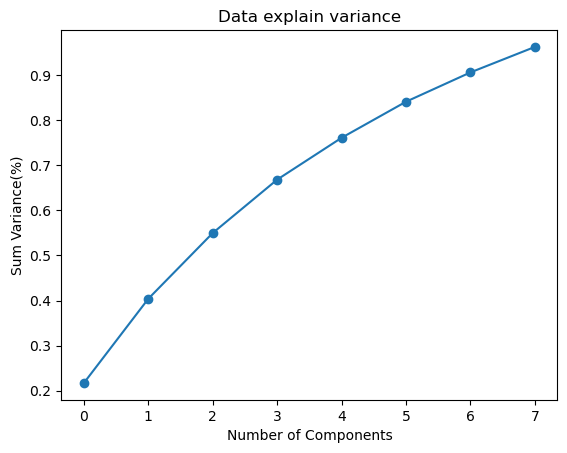

In [110]:
pca = PCA().fit(scaled_data)
plt.figure()
a=[]
for i in range(1,9):
    pca = PCA(n_components=i).fit(scaled_data)
    explained_variance = pca.explained_variance_ratio_
    a.append(explained_variance.sum())
plt.plot(a, marker='o', linestyle='-')
plt.xlabel('Number of Components')
plt.ylabel('Sum Variance(%)')
plt.title('Data explain variance')

It can be observed that the curves after 3 and 4 begin to slow down, but it can be clearly seen that the variance reaches more than 70% at 4.

In [224]:
pca = PCA(n_components=5)  # Initialize PCA
principal_components = pca.fit_transform(scaled_data)


loadings = pca.components_.T * np.sqrt(pca.explained_variance_)
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(5)], index=df_clean.columns)

pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
explained_variances = pca.explained_variance_ratio_


print(loadings_df)
print("Explained variance ratio:", explained_variances)

                                        PC1       PC2       PC3       PC4  \
Phenotype                                                                   
CD3+                               0.200258 -0.670410  0.046521 -0.313029   
CK+                                0.611620 -0.324426  0.264286  0.305385   
Double_TREM-1+CD68+                0.589046  0.315841 -0.600950  0.116610   
Double_positive_CD64+CD68+         0.450498 -0.594102  0.073688 -0.155437   
Q_CD64+CD68+CD163+TREM-1+          0.357421  0.403818  0.582441 -0.208237   
Single_TREM-1+                     0.684972  0.440014 -0.347555 -0.047125   
Triple_CD64+CD68+CD163+            0.194407 -0.147329  0.238447  0.838708   
Triple_positive_CD64+CD68+TREM-1+  0.448332  0.359410  0.535892 -0.239274   
other+                             0.397757 -0.412177 -0.268736 -0.180580   

                                        PC5  
Phenotype                                    
CD3+                               0.208740  
CK+           

1. The larger the absolute value of the load, the greater the importance of the feature in the corresponding principal component.
2. The sign of the loading indicates whether the relationship between the feature and the principal component is positive or negative.

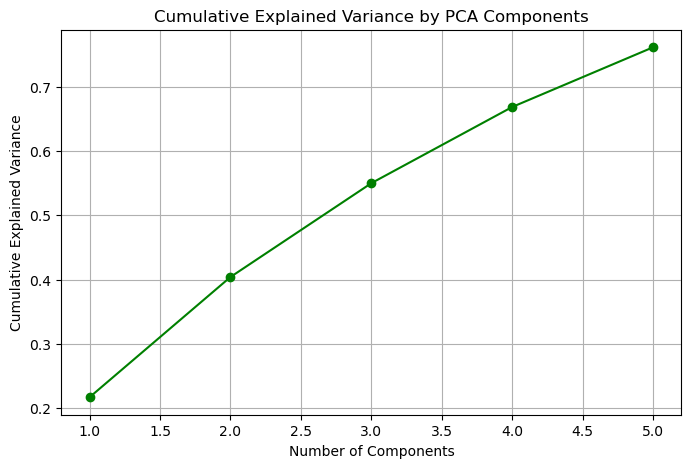

In [124]:
cumulative_variances = np.cumsum(explained_variances)
components = range(1, len(explained_variances) + 1)

plt.figure(figsize=(8, 5))
plt.plot(components, cumulative_variances, marker='o', linestyle='-', color='green')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

The sum of the 4 components does not reach 70%, so I try 5 components

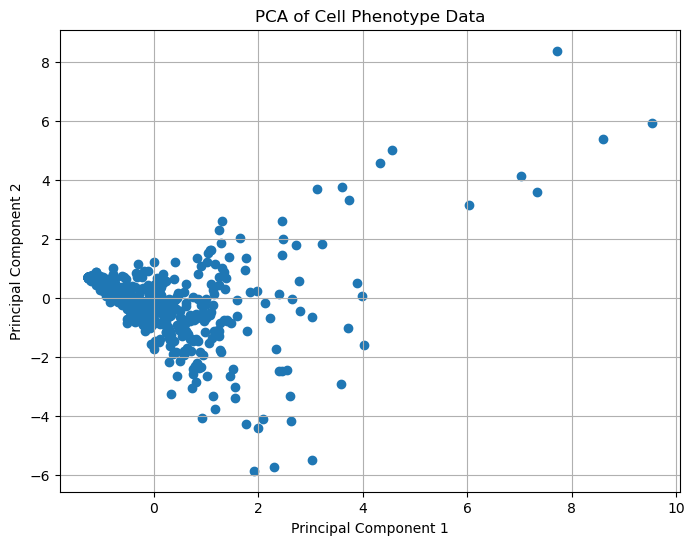

In [128]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'],pca_df['PC2'])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Cell Phenotype Data')
plt.grid(True)
plt.show()

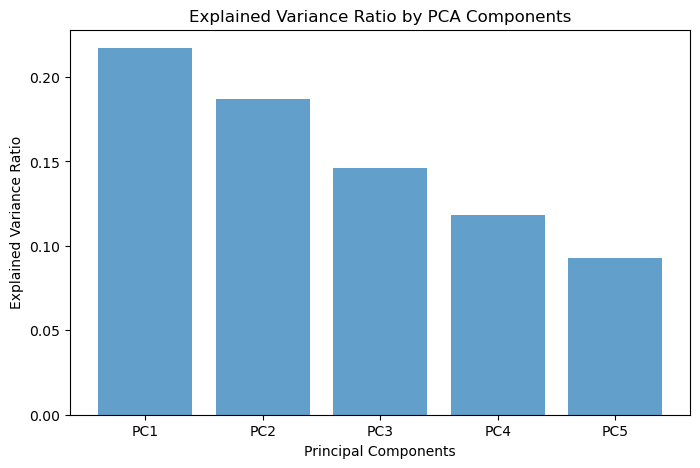

In [126]:
plt.figure(figsize=(8, 5))
plt.bar(components, explained_variances, alpha=0.7, tick_label=['PC1', 'PC2', 'PC3', 'PC4', 'PC5'])
plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')
plt.title('Explained Variance Ratio by PCA Components')
plt.show()


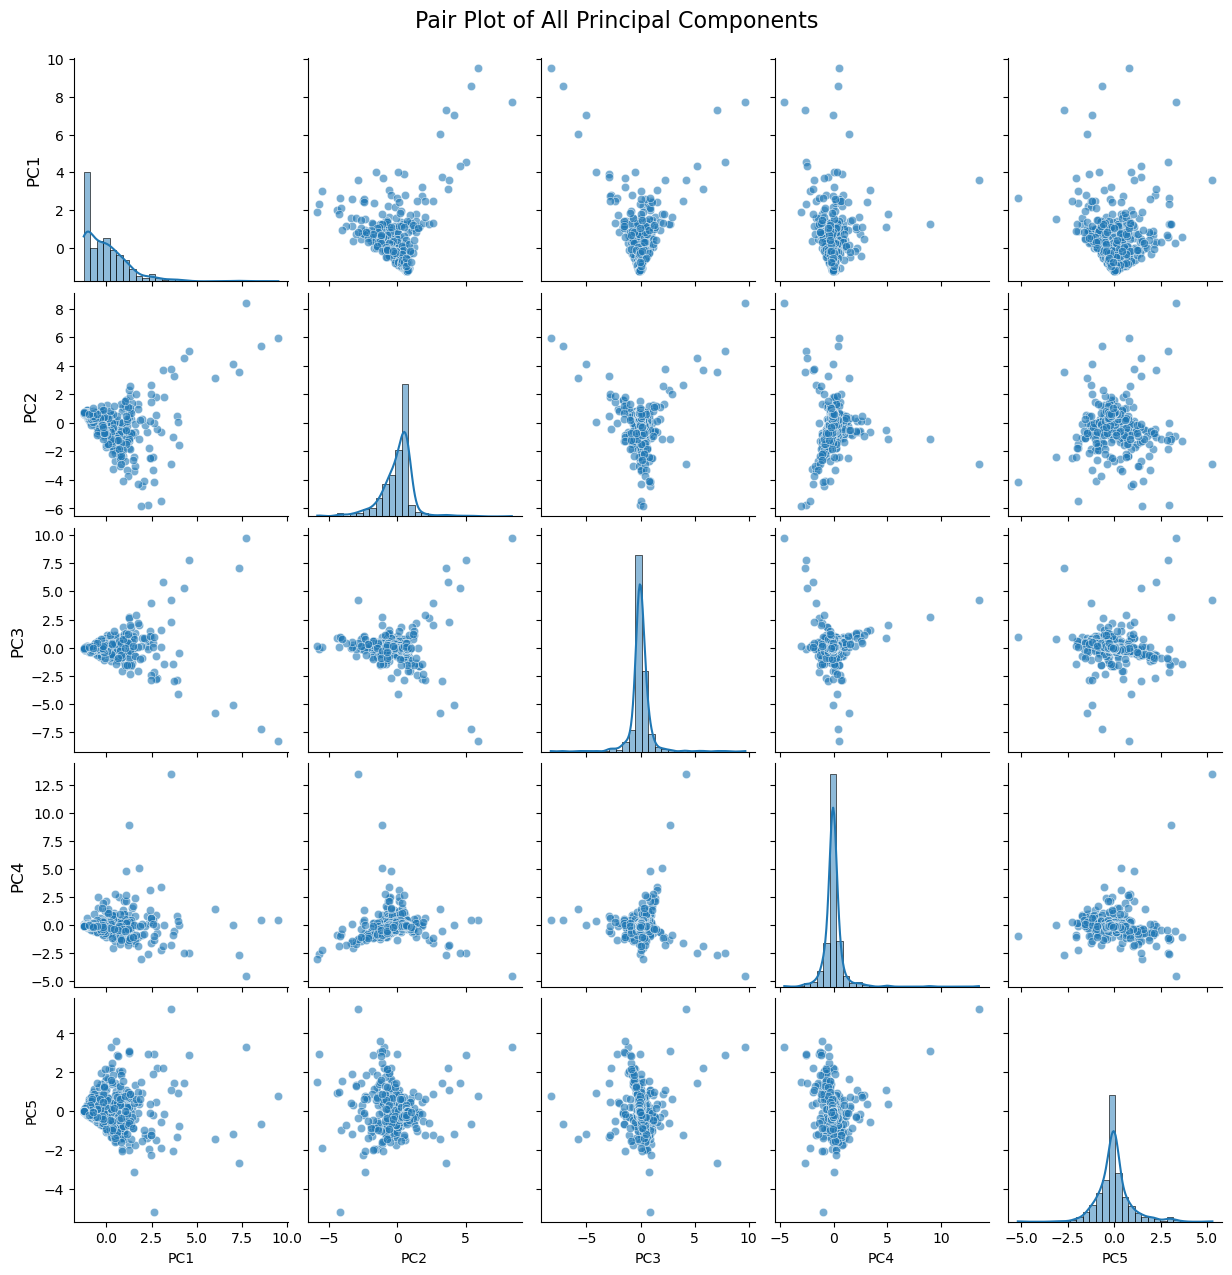

In [225]:
g = sns.pairplot(pca_df, plot_kws={'alpha': 0.6}, diag_kws={'bins': 30, 'kde': True})
g.figure.suptitle('Pair Plot of All Principal Components', size=16, y=1.02)

for i in range(4):
    for j in range(4):
        g.axes[i][j].set_xlabel(f'PC{j+1}', size=12)
        g.axes[i][j].set_ylabel(f'PC{i+1}', size=12)

### T-SNE

In [138]:
perplexities = [5, 30, 50]
learning_rates = [10, 200, 500]

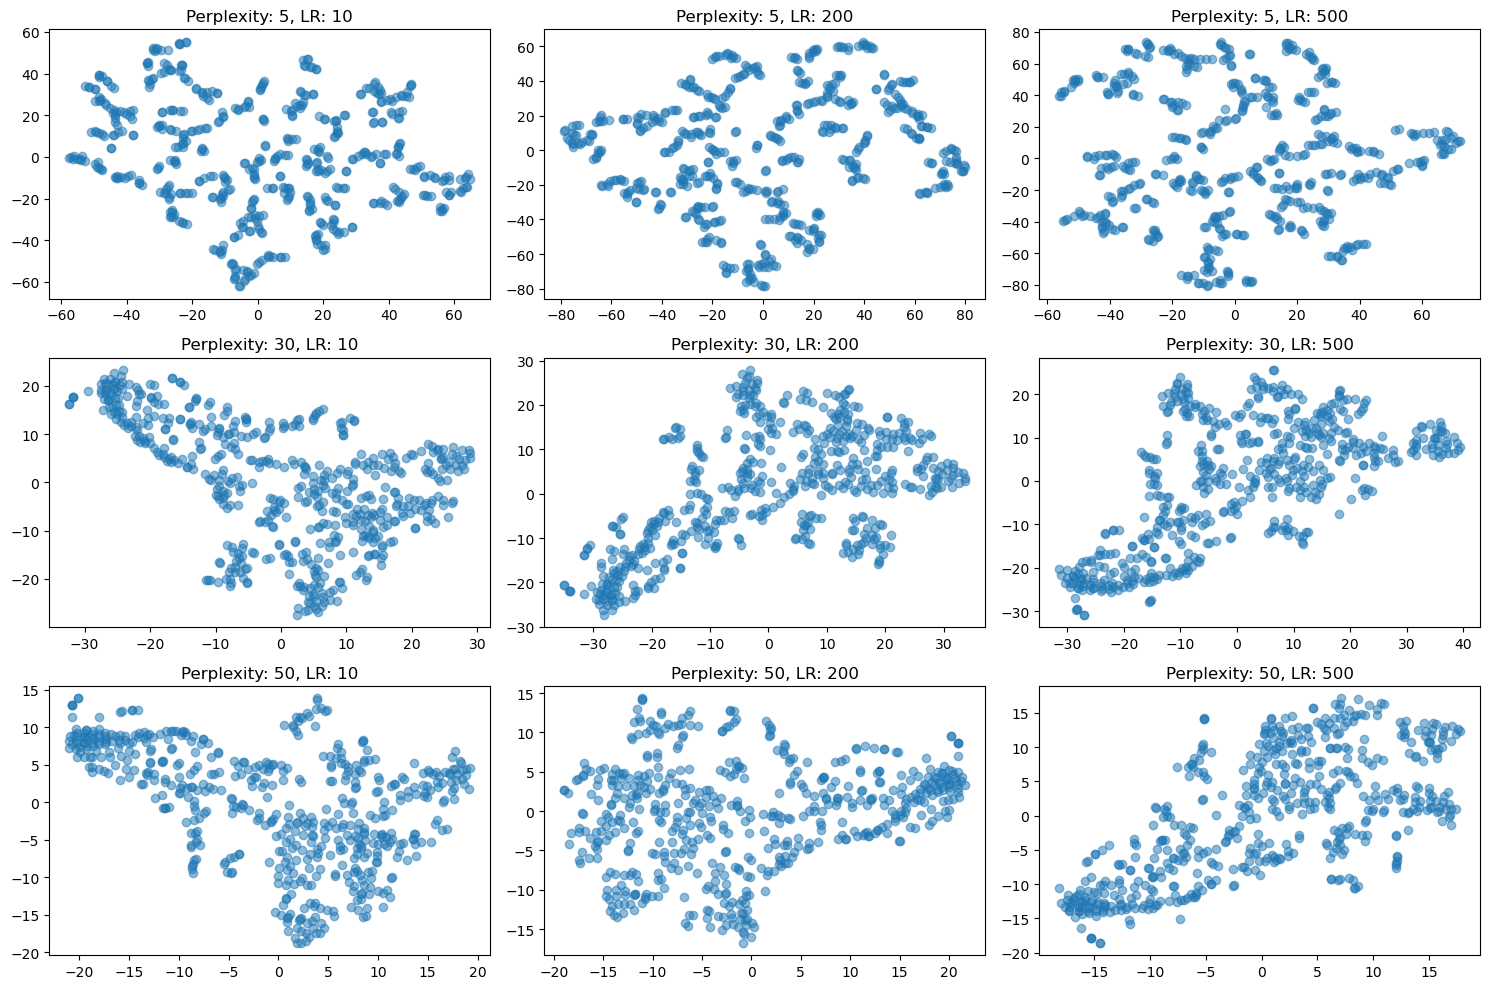

In [200]:
fig, axs = plt.subplots(len(perplexities), len(learning_rates), figsize = (15, 10))

for i, perplexity in enumerate(perplexities):
    for j, learning_rate in enumerate(learning_rates):
        tsne = TSNE(n_components=2, perplexity=perplexity, learning_rate=learning_rate)
        tsne_results = tsne.fit_transform(scaled_data)
        axs[i, j].scatter(tsne_results[:,0], tsne_results[:,1], alpha = 0.5)
        axs[i, j].set_title(f'Perplexity: {perplexity}, LR: {learning_rate}')
plt.tight_layout()

In [234]:
tsne = TSNE(n_components=2, perplexity=30, n_iter=3000, learning_rate=200)
tsne_results = tsne.fit_transform(scaled_data)


Perplexity values ​​are usually recommended to be between 5 and 50

Learning_rate is usually recommended to be between 10 and 1000

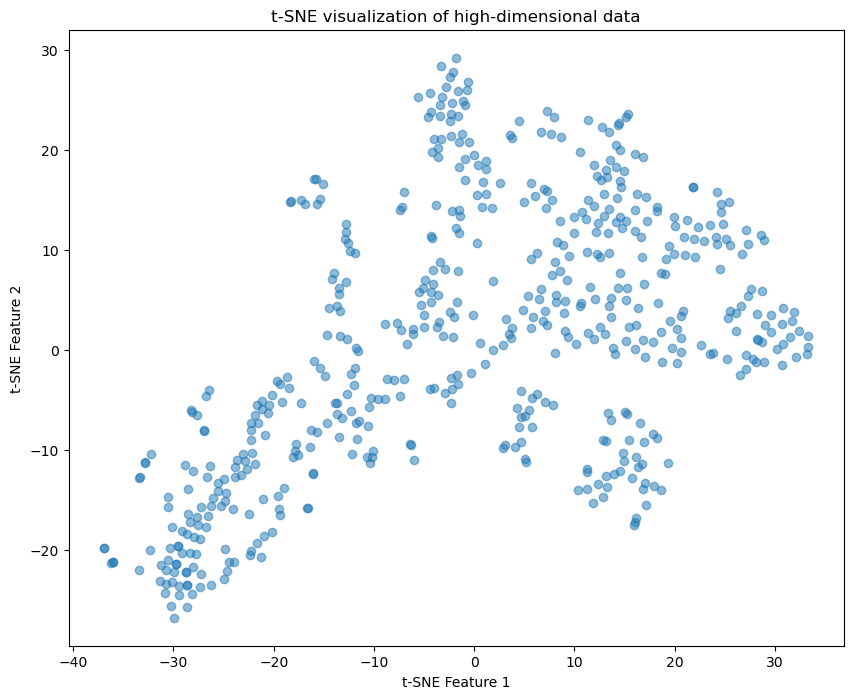

In [235]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], alpha=0.5)
plt.xlabel('t-SNE Feature 1')
plt.ylabel('t-SNE Feature 2')
plt.title('t-SNE visualization of high-dimensional data')
plt.show()

### KMeans

/Users/mrs.zhuang/opt/anaconda3/envs/phys4038/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mrs.zhuang/opt/anaconda3/envs/phys4038/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mrs.zhuang/opt/anaconda3/envs/phys4038/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/mrs.zhuang/opt/anaconda3/envs/phys4038/lib/python3.10/site-packages/skle

Text(0, 0.5, '$J(C_k)$')

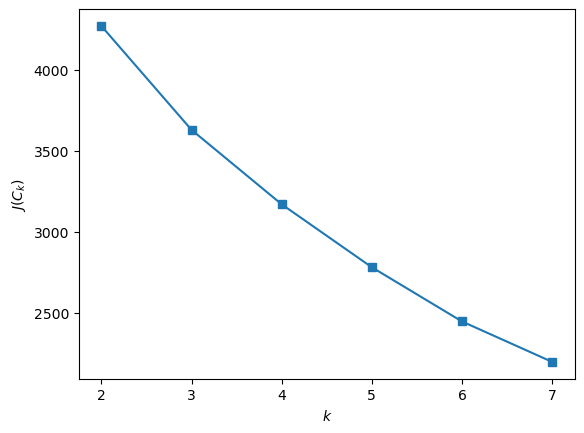

In [236]:
inertia = []
for k in range(2,8):
    kmeans = KMeans(n_clusters= k, random_state=1).fit(scaled_data)
    inertia.append(kmeans.inertia_)
plt.plot(range(2, 8), inertia, marker = 's')
plt.xlabel('$k$')
plt.ylabel('$J(C_k)$')

In [241]:
kmeans = KMeans(n_clusters=4)
kmeans_labels = kmeans.fit_predict(scaled_data)

/Users/mrs.zhuang/opt/anaconda3/envs/phys4038/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


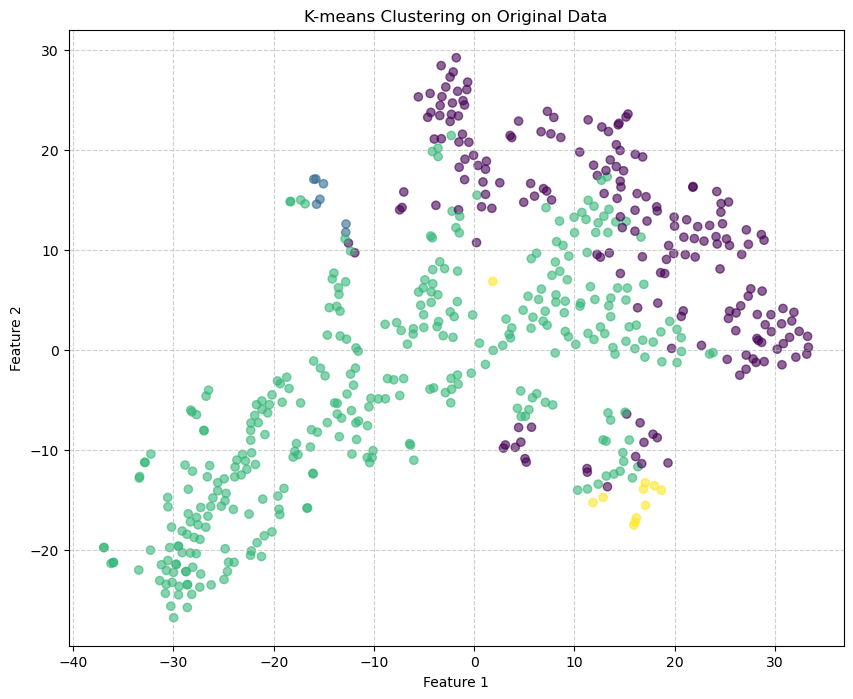

In [259]:
plt.figure(figsize=(10, 8))
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=kmeans_labels, cmap='viridis', alpha=0.6)
plt.title('K-means Clustering on Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True, linestyle='--', alpha=0.6)

### HDBSCAN

In [261]:
min_cluster_sizes = [5, 10, 15]
min_samples_list = [2, 5, 10]

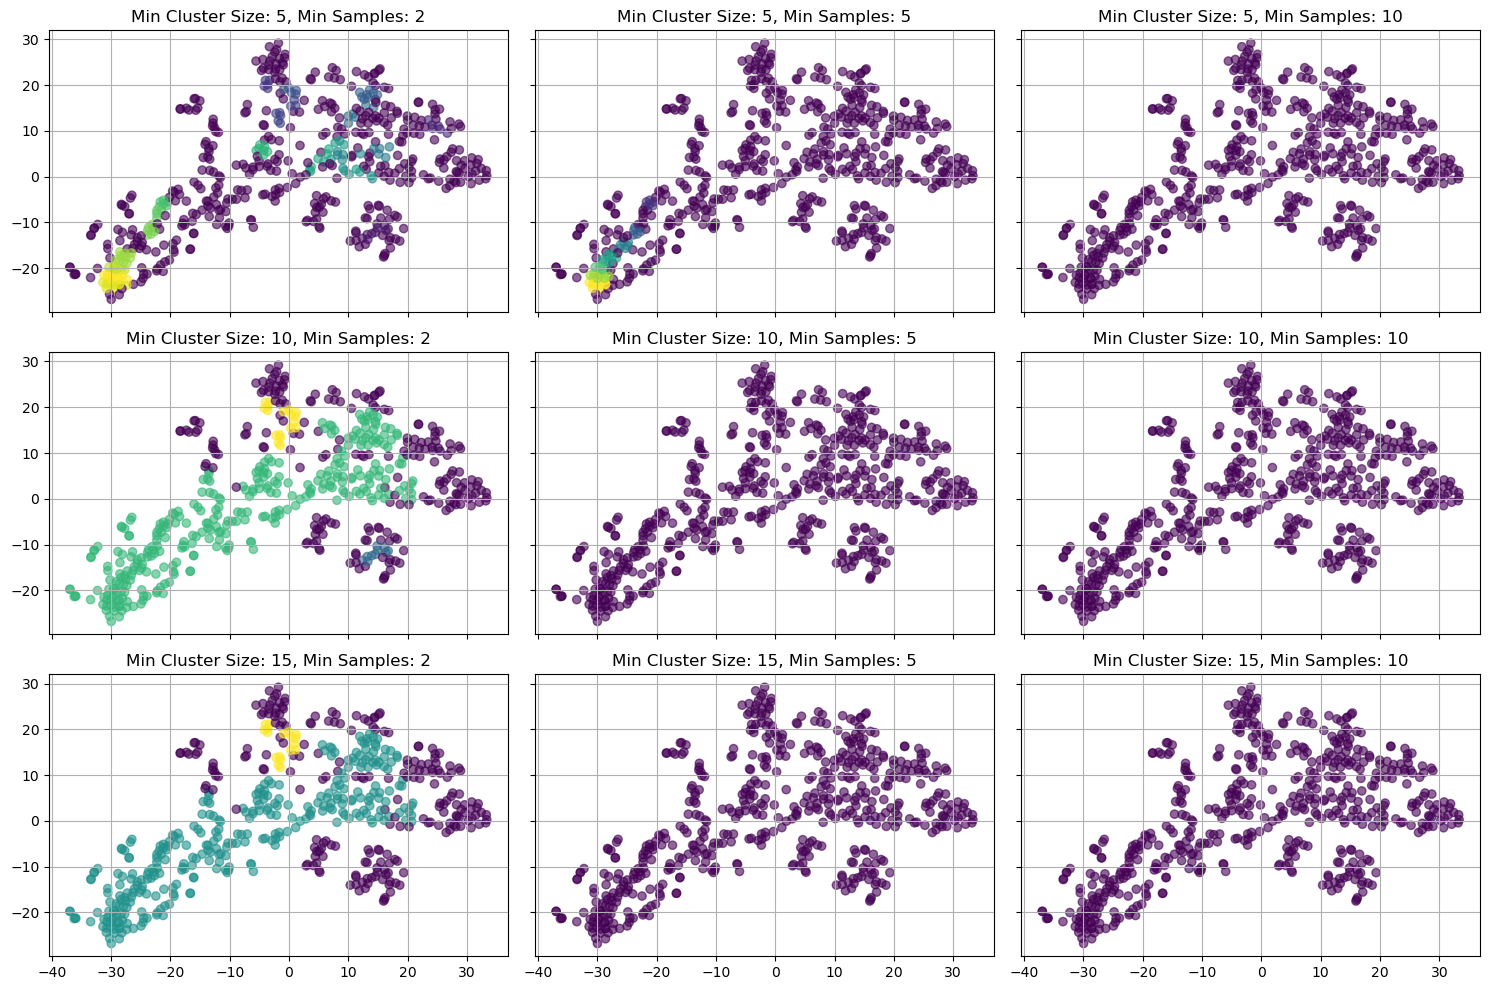

In [262]:
fig, axes = plt.subplots(len(min_cluster_sizes), len(min_samples_list), figsize=(15, 10), sharex=True, sharey=True)

for i, min_cluster_size in enumerate(min_cluster_sizes):
    for j, min_samples in enumerate(min_samples_list):
        
        clusterer = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)
        labels = clusterer.fit_predict(scaled_data)

        ax = axes[i, j]
        scatter = ax.scatter(tsne_results[:, 0], tsne_results[:, 1], c=labels, cmap='viridis', alpha=0.6)
        ax.set_title(f'Min Cluster Size: {min_cluster_size}, Min Samples: {min_samples}')
        ax.grid(True)
plt.tight_layout()

In [263]:
clusterer = HDBSCAN(min_cluster_size=10, min_samples=2)
labels = clusterer.fit_predict(scaled_data)

In [ ]:
labels

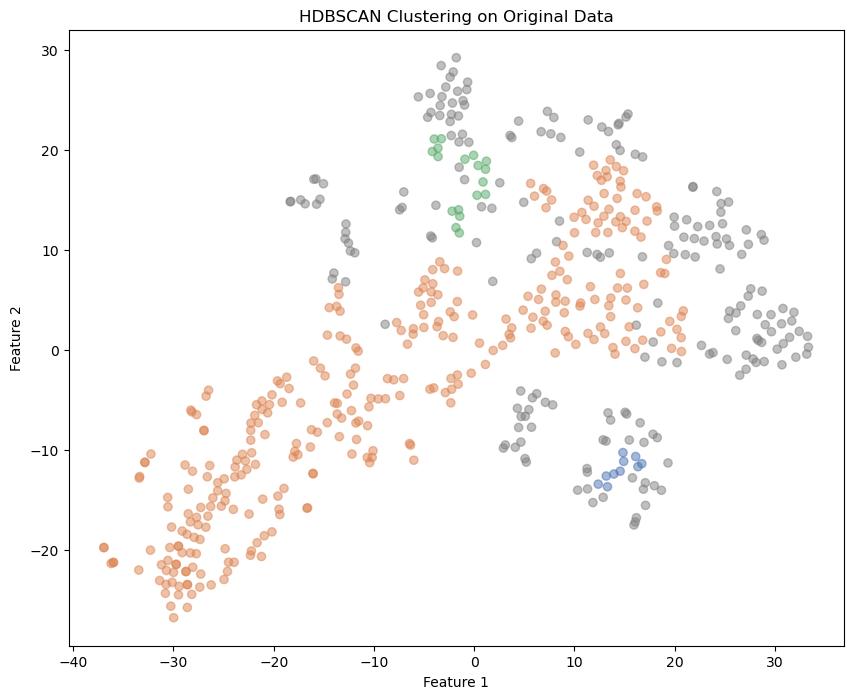

In [264]:
plt.figure(figsize=(10, 8))
palette = sns.color_palette('deep', np.unique(labels).max() + 1)
colors = [palette[x] if x >= 0 else (0.5, 0.5, 0.5) for x in labels]
plt.scatter(tsne_results[:, 0], tsne_results[:, 1], c=colors, alpha=0.5)
plt.title('HDBSCAN Clustering on Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Gaussian Mixture

In [254]:
n_components_options = [2, 3, 4, 5]  # 不同的聚类数量选项
covariance_types = ['full', 'tied', 'diag', 'spherical']  # 协方差类型选项

In [255]:
results = []
for n_components in n_components_options:
    for covariance_type in covariance_types:
        gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=42)
        labels = gmm.fit_predict(scaled_data)
        silhouette = silhouette_score(scaled_data, labels)  # -1 - 1 high good
        aic = gmm.aic(scaled_data)  # AIC low good
        bic = gmm.bic(scaled_data)  # BIC low good
        
        results.append((n_components, covariance_type, silhouette, aic, bic))
        print(f"n_components: {n_components}, type: {covariance_type}, Silhouette: {silhouette}, AIC: {aic}, BIC: {bic}")

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
n_components: 2, type: full, Silhouette: 0.7446717007344931, AIC: 11562.874846511104, BIC: 12032.655938837794
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel on

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


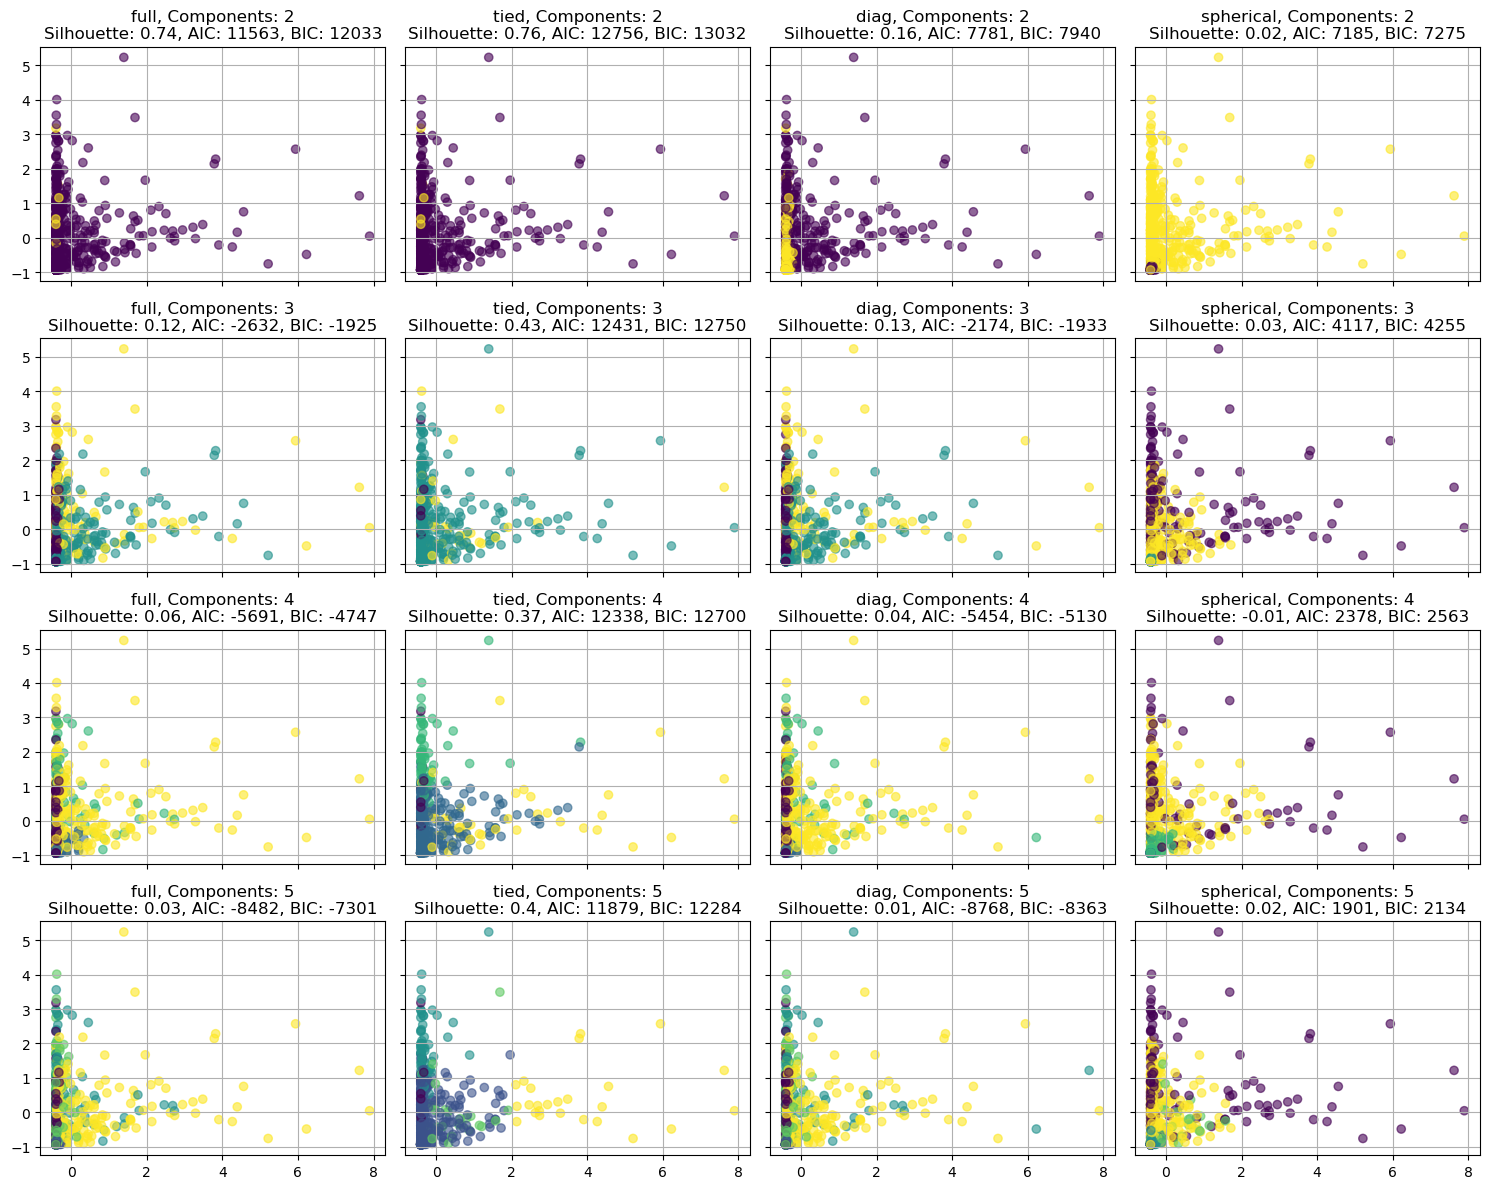

In [256]:
fig, axes = plt.subplots(len(n_components_options), len(covariance_types), figsize=(15, 12), sharex=True, sharey=True)
for idx, (n_components, covariance_type, silhouette, aic, bic) in enumerate(results):
    ax = axes[idx // len(covariance_types)][idx % len(covariance_types)]
    gmm = GaussianMixture(n_components=n_components, covariance_type=covariance_type, random_state=42)
    gmm.fit(scaled_data)
    labels = gmm.predict(scaled_data)
    scatter = ax.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis', alpha=0.6)
    ax.set_title(f'{covariance_type}, Components: {n_components}\nSilhouette: {round(silhouette, 2)}, AIC: {round(aic)}, BIC: {round(bic)}')
    ax.grid(True)

plt.tight_layout()

In [211]:
results_df = pd.DataFrame(results, columns=['n_components', 'covariance_type', 'silhouette', 'AIC', 'BIC'])

print(results_df)

    n_components covariance_type  silhouette           AIC           BIC
0              2            full    0.744672  11562.874847  12032.655939
1              2            tied    0.763450  12755.887120  13031.721889
2              2            diag    0.163433   7780.700477   7940.167454
3              2       spherical    0.016825   7184.936662   7275.444946
4              3            full    0.124249  -2631.838854  -1925.012256
5              3            tied    0.428758  12431.423599  12750.357552
6              3            diag    0.128292  -2174.439126  -1933.083703
7              3       spherical    0.033720   4116.837432   4254.754817
8              4            full    0.057520  -5690.834202  -4746.962099
9              4            tied    0.367825  12337.786774  12699.819909
10             4            diag    0.044042  -5453.628166  -5130.384295
11             4       spherical   -0.009946   2378.082496   2563.408982
12             5            full    0.026921  -8482

/var/folders/9t/ybh64q851xs68nqllz2l41wh0000gn/T/ipykernel_1155/2293786854.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  silhouette_heatmap = results_df.pivot("n_components", "covariance_type", "silhouette")


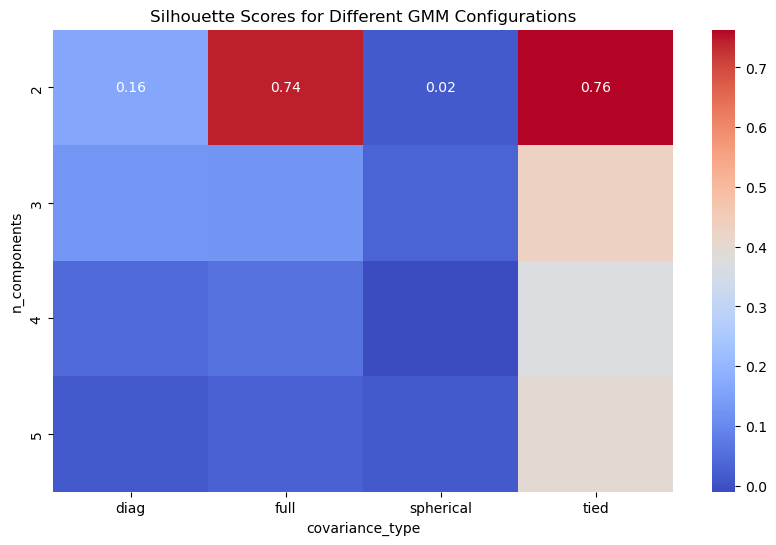

/var/folders/9t/ybh64q851xs68nqllz2l41wh0000gn/T/ipykernel_1155/2293786854.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  aic_heatmap = results_df.pivot("n_components", "covariance_type", "AIC")


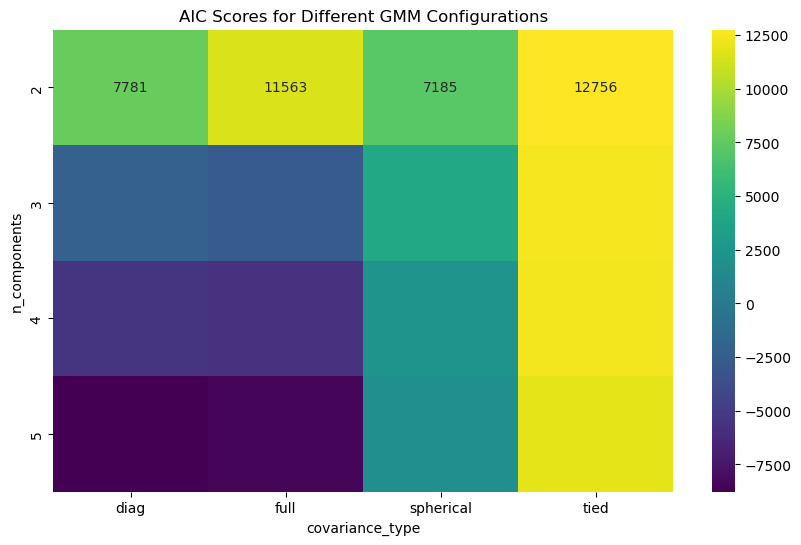

/var/folders/9t/ybh64q851xs68nqllz2l41wh0000gn/T/ipykernel_1155/2293786854.py:16: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  bic_heatmap = results_df.pivot("n_components", "covariance_type", "BIC")


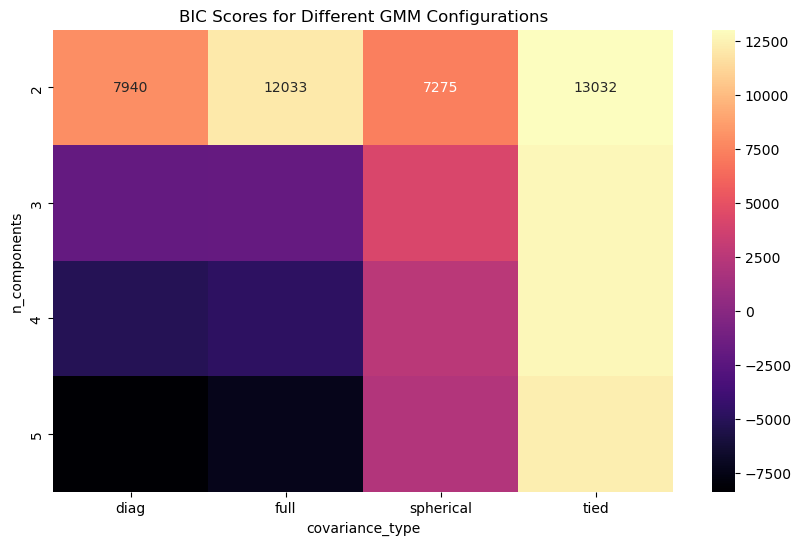

In [212]:
plt.figure(figsize=(10, 6))
silhouette_heatmap = results_df.pivot("n_components", "covariance_type", "silhouette")
sns.heatmap(silhouette_heatmap, annot=True, cmap="coolwarm", fmt=".2f")
plt.title('Silhouette Scores for Different GMM Configurations')
plt.show()

# AIC
plt.figure(figsize=(10, 6))
aic_heatmap = results_df.pivot("n_components", "covariance_type", "AIC")
sns.heatmap(aic_heatmap, annot=True, cmap="viridis", fmt=".0f")
plt.title('AIC Scores for Different GMM Configurations')
plt.show()

# BIC
plt.figure(figsize=(10, 6))
bic_heatmap = results_df.pivot("n_components", "covariance_type", "BIC")
sns.heatmap(bic_heatmap, annot=True, cmap="magma", fmt=".0f")
plt.title('BIC Scores for Different GMM Configurations')
plt.show()

Full， components 2/3

In [266]:
gmm = GaussianMixture(n_components=2, covariance_type='full')
gmm.fit(scaled_data)
labels = gmm.predict(scaled_data)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


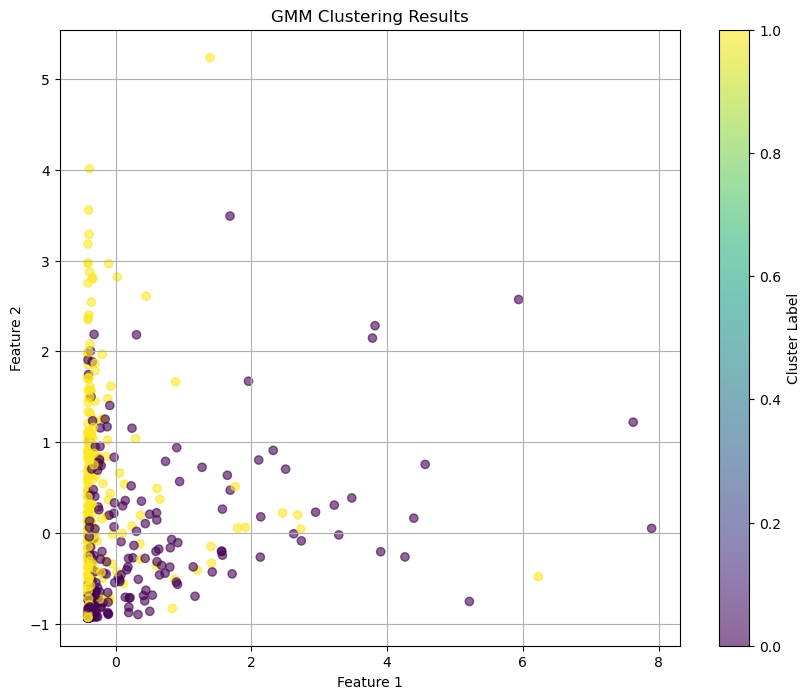

In [267]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.colorbar(scatter, label='Cluster Label')

plt.title('GMM Clustering Results')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.grid(True)